<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px
import warnings; warnings.simplefilter('ignore')
sns.set()

# Исследование структуры данных

1) Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
hh = pd.read_csv('путь_к_файлу_hh_dataыуе.csv', sep=';')

2) Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
hh.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3) Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4) Обратите внимание на информацию о числе непустых значений.

In [4]:
hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

3 из 11 колонок имеют пропуски в веденных данных, а именно КОЛОНКИ 

[
    'Опыт работы',
    'Последнее/нынешнее место работы',
    'Последняя/нынешняя должность'
]

Все колонки имеют одинаковый тип данных, следовательно будет необходимо привести данные к соответствующим типам.

5) Выведите основную статистическую информацию о столбцах.


In [5]:
hh.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1) Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [6]:
def get_education(arg):
    """Функция принимает на вход значение аргумента из признакак 'Образование и ВУЗ',
    затем возвращает одно из значений категории уровня образования:
    (высшее, неоконченное высшее, среднее, среднее специальное)

    Args:
        arg (Object): необходимо преобразовать к типу str()
    Returns:
    Одно из четырех категориальных значений edu
    """
    edu = 'Высшее'
    edu1 = 'Неоконченное высшее'
    edu2 = 'Среднее'
    edu3 = 'Среднее специальное'
    arg_list = arg.split()
    if arg_list[0] == 'Высшее':
        return edu
    if arg_list[0] == 'Неоконченное':
        return edu1
    if arg_list[0] == 'Среднее':
        if arg_list[1] == 'специальное':
            return edu3
        return edu2
hh['Образование'] = hh['Образование и ВУЗ'].apply(get_education)
hh = hh.drop('Образование и ВУЗ', axis=1)

2) Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [7]:
hh['Пол'] = hh['Пол, возраст'].apply(lambda x: (x.split(','))[0])
hh['Возраст'] = hh['Пол, возраст'].apply(lambda x: (x.split())[2]).astype('uint64')
hh = hh.drop(['Пол, возраст'], axis=1)

3) Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [8]:
def get_experience(arg):
    """Функция преодразования опыта работы из формата n лет m месяцев 
    в формат n месяцев и отбрасывает всю ненужную информацию. 
    Функция умеет возвращать пустое значение (NaN) 
    и преобразовывать значение (Не указано) в пустые (NaN).

    Args:
        arg (Object): Аргумент из признака (Опыт работы)

    Returns:
        float16: знчение опыта работы в месяцах
    """
    if arg is np.nan:
        return np.nan
    if arg == 'Не указано':
        return np.nan
    years = ['год','года','лет']
    months = ['месяца','месяцев']
    count_years = 0
    count_months = 0
    arg_split = (str(arg).split())[2:6]
    for i in range(len(arg_split)):
        if arg_split[i] in years:
            count_years = arg_split[i-1]
        if arg_split[i] in months:
            count_months = arg_split[i-1]
    return (int(count_months)+int(count_years)*12)
hh['Опыт работы (месяц)'] = hh['Опыт работы'].apply(get_experience).astype('float16')
hh = hh.drop('Опыт работы', axis=1)
    

4) Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [9]:
def get_city(arg):
    """Функция преобразования региона проживания в категориальный признак
    по числу населения из городов-милионников и всех остальных.

    Args:
        arg (Object): Аргумент из признака (Город, переезд, командировки)
    
    Returns:
        city | 'другие'
    """
    million_cities = [
    'Новосибирск', 'Екатеринбург', 'Нижний Новгород', 
    'Казань', 'Челябинск', 'Омск', 'Самара', 
    'Ростов-на-Дону', 'Уфа', 'Красноярск', 
    'Пермь', 'Воронеж', 'Волгоград'
    ]
    city = (str(arg).split())[0]
    if city in million_cities or city in ['Москва','Санкт-Петербург']:
        return city
    return 'другие'

def get_to_move(arg):
    """Функция преобразования готовности к переезду в категориальный признак
    готов(-а) - True | не готов(-а) - False.

    Args:
        arg (Object): Аргумент из признака (Город, переезд, командировки)
    
    Returns:
        True | False
    """
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True

def get_business_trip(arg):
    """Функция преобразования готовности к командировкам в категориальный признак 
    готов(-а) | не готов(-а)

    Args:
        arg (Object): Аргумент из признака (Город, переезд, командировки)
        
    Returns:
        True | False
    """
    if ('не готов к командировкам' in arg) or ('не готова к командировкам' in arg):
        return False
    return True
hh['Город'] = hh['Город, переезд, командировки'].apply(get_city)
hh['Готовность к переезду'] = hh['Город, переезд, командировки'].apply(get_to_move)
hh['Готовность к командировкам'] = hh['Город, переезд, командировки'].apply(get_business_trip)
hh = hh.drop('Город, переезд, командировки', axis=1)


5) Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [10]:
hh['полная занятость'] = hh['Занятость'].apply(lambda x: ('полная занятость' in x))
hh['частичная занятость'] = hh['Занятость'].apply(lambda x: ('частичная занятость' in x))
hh['проектная работа'] = hh['Занятость'].apply(lambda x: ('проектная работа' in x))
hh['стажировка'] = hh['Занятость'].apply(lambda x: ('стажировка' in x))
hh['волонтерство'] = hh['Занятость'].apply(lambda x: ('волонтерство' in x))
hh['полный день'] = hh['График'].apply(lambda x: ('полный день' in x))
hh['вахтовый метод'] = hh['График'].apply(lambda x: ('вахтовый метод' in x))
hh['сменный график'] = hh['График'].apply(lambda x: ('сменный график' in x))
hh['гибкий график'] = hh['График'].apply(lambda x: ('гибкий график' in x))
hh['удаленная работа'] = hh['График'].apply(lambda x: ('удаленная работа' in x))
hh = hh.drop('Занятость', axis=1)
hh = hh.drop('График', axis=1)

6) (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1) Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2) Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3) Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4) Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [11]:
#Создаем DataFrame exch_df с данными о курсе валюты и удаляем признаки (per,time,vol)
exch_df = pd.read_csv('путь_к_файлу_ExchangeRates.csv', sep=',')
exch_df = exch_df.drop(['per','time','vol'],axis=1)
#приводим признаки (data) и (Обновление резюме) к формату datatime и извлекаем дату 
exch_df['date'] = pd.to_datetime(exch_df['date']).dt.date
hh['Обновление резюме'] = pd.to_datetime(hh['Обновление резюме'], dayfirst=True).dt.date
#Извлекаем данные по сумме и валюте ЗП из признака ЗП
hh['ЗП (сумма)'] = hh['ЗП'].apply(lambda x: (x.split())[0]).astype('float64')
hh['ЗП (валюта)'] = hh['ЗП'].apply(lambda x: (x.split())[1])
hh = hh.drop('ЗП', axis=1)
#Создаем новый DataFrame с данными о желаем ЗП в рублях
curr_lst = {
        'руб.':'RUB',
        'грн.':'AUH',
        'бел.руб.':'BYN',
        'сум':'UZS'
    }
hh['ЗП (валюта)'] = hh['ЗП (валюта)'].apply(lambda x: x if x not in curr_lst else curr_lst[x])
df = hh.merge(exch_df, how='left', left_on=['Обновление резюме','ЗП (валюта)'], right_on=['date','currency'])
df['close'] = df.close.fillna(1)
df['proportion'] = df.proportion.fillna(1)
df['ЗП (руб)'] = df.close*df['ЗП (сумма)']/df.proportion
#Удаляем лишьние признаки
df = df.drop(['ЗП (сумма)','ЗП (валюта)','close','proportion','currency','date'], axis=1)

# Исследование зависимостей в данных

1) Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Text(0.5, 1.0, 'Гистограмма распределения возраста среди соискателей')

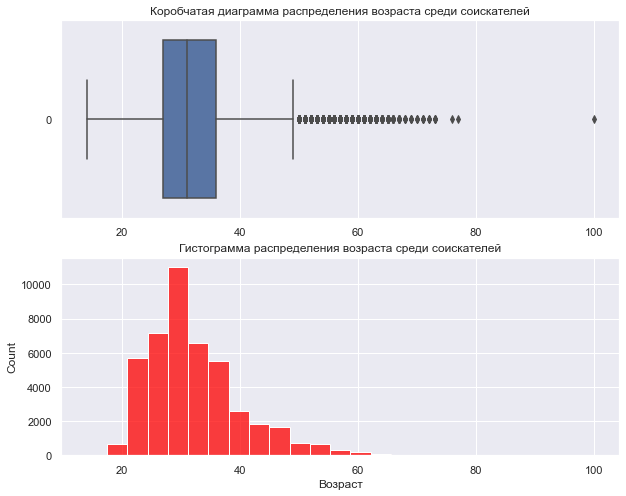

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
sns.boxplot(
    data=df['Возраст'],
    ax=axes[0],
    orient='h'
)
sns.histplot(
    data = df['Возраст'],
    bins = 25,
    color='red',
    ax=axes[1],
)
axes[0].set_title('Коробчатая диаграмма распределения возраста среди соискателей')
axes[1].set_title('Гистограмма распределения возраста среди соискателей')

Мода распределения признака "Возраст" по соискателям работы равна 30.

Минимальное и максимальное значения признака "Возраст" равны 14 и 100 лет соответственно.

Распределение признака "Возраст" находится в интервале от 27 до 40 лет.

Коробчатая диаграмма указывает на наличие выбросов, значимыми из которых могут являться значения признака "Возраст" более 60-70 лет.


2) Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Text(0.5, 1.0, 'Гистограмма распределения опыта работы в месяцах среди соискателей')

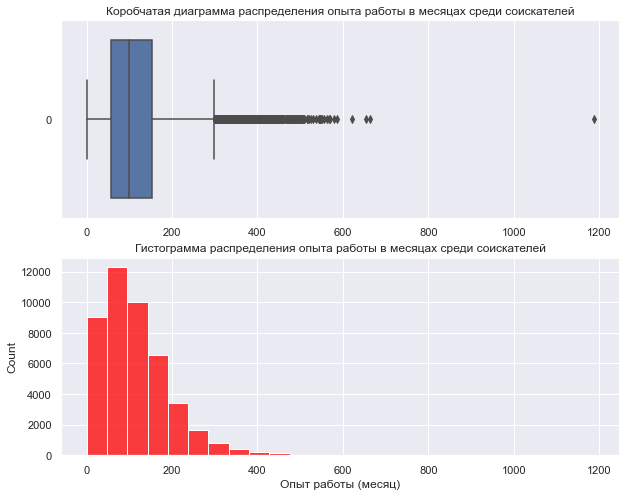

In [13]:
fig, axes = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,8)
)
sns.boxplot(
    data=df['Опыт работы (месяц)'],
    ax=axes[0],
    orient='h'
)
sns.histplot(
    data = df['Опыт работы (месяц)'],
    bins = 25,
    color='red',
    ax=axes[1],
)
axes[0].set_title('Коробчатая диаграмма распределения опыта работы в месяцах среди соискателей')
axes[1].set_title('Гистограмма распределения опыта работы в месяцах среди соискателей')

Из гистограммы видно, что модальное значение признака "Опыт работы (месяц)" составляет приблизительно 100 месяцев. 

Минимальное и максимальное значения признака "Опыт работы (месяц)" составляют 0 и 1200 месяцев соответственно.

Интервал признака "Опыт работы (месяц)" большинства соискателей находится в диапазоне от 0 до 200 месяцев.

Значения выше 600 месяцев можно отнести к выбросам, так как крайне редко люди имеют такое значение.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


count    4.474400e+04
mean     7.645190e+04
std      1.358925e+05
min      1.000000e+00
25%      3.700000e+04
50%      5.821146e+04
75%      9.383885e+04
max      2.430488e+07
Name: ЗП (руб), dtype: float64

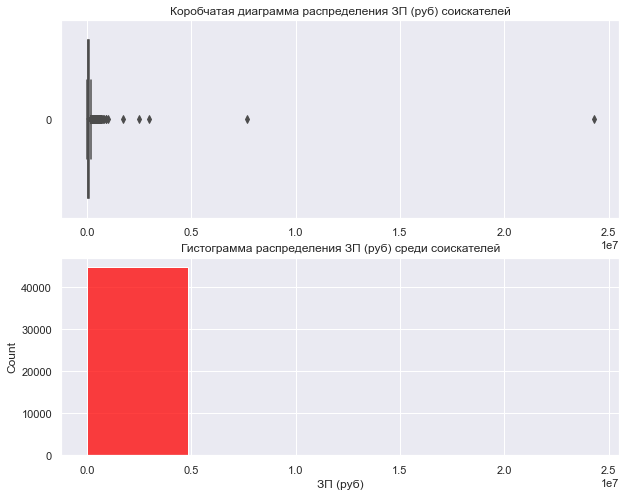

In [14]:
fig, axes = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(10,8)
)
sns.boxplot(
    data=df['ЗП (руб)'],
    ax=axes[0],
    orient='h'
)
sns.histplot(
    data = df['ЗП (руб)'],
    bins = 5,
    color='red',
    ax=axes[1],
)
axes[0].set_title('Коробчатая диаграмма распределения ЗП (руб) соискателей')
axes[1].set_title('Гистограмма распределения ЗП (руб) среди соискателей')
df['ЗП (руб)'].describe()

Из гистограммы видно, что модальное значение признака 'ЗП (руб)' составляет приблизительно 50 тыс. рублей. 

Минимальное и максимальное значения признака 'ЗП (руб)' составляют 1 и 24 млн. рублей соответственно.

Интервал признака 'ЗП (руб)' большинства соискателей находится в диапазоне от 37 до 94 тыс. рублей.

Значения выше 500 тыс. рублей  можно отнести к выбросам, так как крайне редко люди имеют такое значение заработной платы.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

<AxesSubplot:xlabel='Образование', ylabel='ЗП (руб)'>

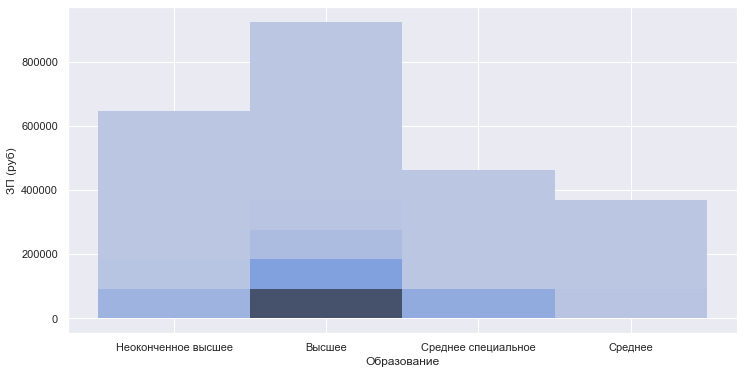

In [15]:
fig = plt.figure(figsize=(12,6))
sns.histplot(
    data=df[df['ЗП (руб)']<1000000],
    x='Образование',
    y='ЗП (руб)',
    bins=10
)

Значение признака "ЗП (руб)" выше у категории соискателей с уровнем образования "Высшее", на втором месте идет признак "Неоконченное высшее", затем "Среднее специальное" и "Среднее". Однако, интервал медианного значения признака "ЗП (руб)" у категорий "Неоконченное высшее" и "Среднее специальное" одинаков. Признак "Образование" является важной характеристикой при оценке уровня заработной платы.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

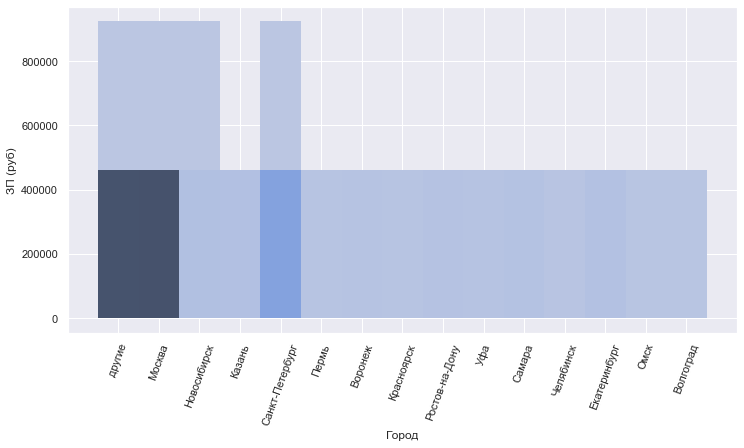

In [16]:
fig = plt.figure(figsize=(12,6))
histplot = sns.histplot(
    data=df[df['ЗП (руб)']<1000000],
    x='Город',
    y='ЗП (руб)',
    bins=2
)
histplot.tick_params(axis='x', rotation = 70)

Наибольшее медианное значение признака 'ЗП (руб)' наблидается в категории городов "другие" и "Москва". Наибольший размах признака 'ЗП (руб)' наблюдается в категории "другие", "Москва", "Новосибирск" и "Санкт-Петербург". 

Признака "Город" может быть использован для оценки уровня признка 'ЗП (руб)', как дополнительный фактор, но не основной.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [17]:
data_df = df.groupby(
    ['Готовность к переезду','Готовность к командировкам'],
    as_index=False
)['ЗП (руб)'].median()
fig = px.bar(
    data_frame=data_df,
    x='ЗП (руб)',
    y='Готовность к переезду',
    barmode='group',
    color='Готовность к командировкам',
    orientation='h',
    title='Медианная желаемая сумма соискателей'    
)
fig.show()
fig.write_html('plotly/move_business.html')


При анализе признака "ЗП (руб)" в зависимости от готовности к переезду и готовности к командировкам было выявлено, что сочетание готовности к переезду и к командировкам.  

Минимальный уровень заработной платы у кандидатов, которые не готовы к командировкам и переездам. 

Готовность к переезду в зависимости от готовности к командировкам имеет различия в медианной заработной плате, так соискатели готовые к командировкам, но не готовые к переезду имели уровень ЗП выше, чем соискатели готовые к переезду, но не готовые к омандировкам.

Основываясь на данные на графике, можно сказать, что готовность к командировкам влечет за собой и выше уровень заработной платы. При готовности кандидата к переезду и командировкам его ожидает наивысшая заработная плата.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

Text(0.5, 1.0, 'Тепловая карта желаемой зарплаты')

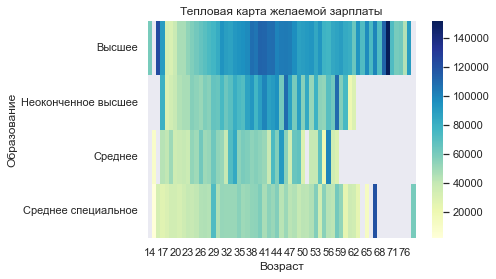

In [18]:
age_salary = df.pivot_table(
    values='ЗП (руб)',
    columns='Возраст',
    index='Образование'
)
heatmap = sns.heatmap(
    data=age_salary,
    cmap='YlGnBu'
)
heatmap.set_title('Тепловая карта желаемой зарплаты')

Основываясь на данные указанные на графике тепловой карты можно сделать заключение, чем выше возраст кандидата и уровень образования, тем выше его заработная плата. Также можно сказать, что соискатели с высшем образованием продолжают работать дольше, чем соискатели с уровнем образования ниже.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

<AxesSubplot:xlabel='Возраст', ylabel='Опыт работы (лет)'>

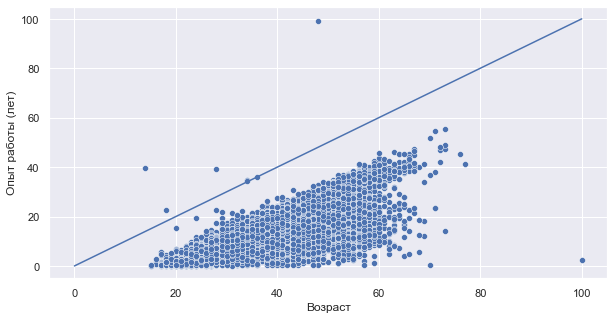

In [19]:
fig = plt.figure(figsize=(10,5))
df['Опыт работы (лет)'] = df['Опыт работы (месяц)'].apply(lambda x: x/12)
sns.lineplot(x=[0,100],y=[0,100])
sns.scatterplot(
    x='Возраст',
    y='Опыт работы (лет)',
    data=df
)

На графике рассеивания признака 'Возраст' и 'Опыт работы (лет)' отчетливо наблюдается тенденция к росту опыта работы от возраста, что является логичным. Однако это не может указывать на уровень квалификации соискателя.

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44744 entries, 0 to 44743
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  uint64 
 8   Опыт работы (месяц)              44574 non-null  float16
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  bool   
 12  полная занятость  

In [21]:
data_df = df.groupby(
    ['Пол','Образование'],
    as_index=False
)['ЗП (руб)'].median()
fig = px.bar(
    data_frame=data_df,
    x='ЗП (руб)',
    y='Пол',
    barmode='group',
    color='Образование',
    orientation='h',
    title='Медианная желаемая ЗП соискателей по уровню образования и полу'    
)
fig.show()
fig.write_html('plotly/sex_edu.html')

При анализе графика "Медианная желаемая ЗП соискателей по уровню образования и полу" было выявлено, что значение признака "ЗП (руб)" зависит от призака "Пол" и "Образование". 

У женщин с сопостовим уровнем образования отмечается ниже уровень признака "ЗП (руб)".

In [22]:
data_df = df.groupby(
    ['Пол','Готовность к переезду'],
    as_index=False
)['ЗП (руб)'].median()
fig = px.bar(
    data_frame=data_df,
    x='ЗП (руб)',
    y='Пол',
    barmode='group',
    color='Готовность к переезду',
    orientation='h',
    title='Медианная желаемая ЗП соискателей по готовности к переезду и полу'    
)
fig.show()
fig.write_html('plotly/sex_move.html')

На диаграмме изображено влияние признаков "Пол" и "Готовность к переезду" на медианный уровень признака "ЗП (руб)". 

Видно, что медианный уровень признака "ЗП (руб)" для женщин не готовых к перезду ниже, чем для женщин готовых к перезду и мужчин не готовых к переезду. Медианный уровень признака "ЗП (руб)" одинаков для мужчин не готовых к перезду и для женщин готовых к переезду. 

Сочетание двух признаков "Пол" и "Готовность к переезду" может служить для прогноза уровня признака "ЗП (руб)".

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [23]:
dupl_columns = list(df.columns)
df = df.drop_duplicates(subset=dupl_columns)

2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44583 entries, 0 to 44743
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44583 non-null  object 
 1   Последнее/нынешнее место работы  44582 non-null  object 
 2   Последняя/нынешняя должность     44581 non-null  object 
 3   Обновление резюме                44583 non-null  object 
 4   Авто                             44583 non-null  object 
 5   Образование                      44583 non-null  object 
 6   Пол                              44583 non-null  object 
 7   Возраст                          44583 non-null  uint64 
 8   Опыт работы (месяц)              44415 non-null  float16
 9   Город                            44583 non-null  object 
 10  Готовность к переезду            44583 non-null  bool   
 11  Готовность к командировкам       44583 non-null  bool   
 12  полная занятость  

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [25]:
df = df.dropna(how='any', axis=0, subset=['Последнее/нынешнее место работы','Последняя/нынешняя должность'])
df['Опыт работы (месяц)'] = df['Опыт работы (месяц)'].fillna(df['Опыт работы (месяц)'].median())

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [26]:
outliers = df[(df['ЗП (руб)']<1000) | (df['ЗП (руб)']>1000000)]
df = df.drop(outliers.index)

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [27]:
outliers_age = df[df['Опыт работы (лет)'] > df['Возраст']]
df = df.drop(outliers_age.index)

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

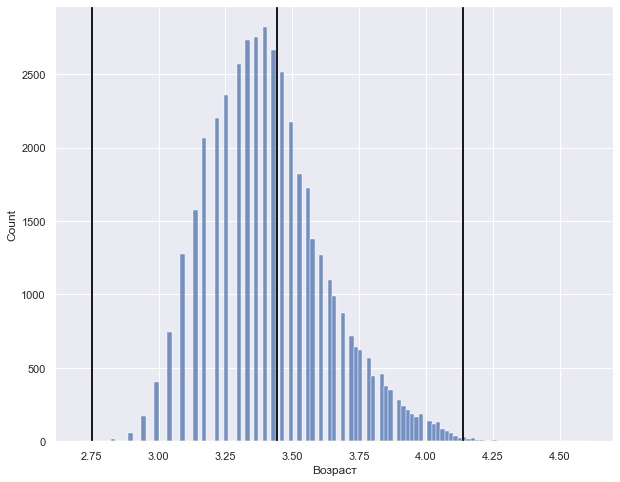

In [28]:
log_age = np.log(df['Возраст'])
fig, axes = plt.subplots(1,1,figsize=(10,8))
histplot = sns.histplot(data=log_age)
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline((log_age.mean()-3*log_age.std()), color='k', lw=2)
histplot.axvline((log_age.mean()+3*log_age.std()), color='k', lw=2)

Логарифмическое распределение ассиметрично распределен в правую сторону

In [29]:
#Поиск отклонений с помощью функции
def outliers_z_score(data,feature,log_scale=True,left=3,right=4):
    """Функция подсчета числа выбросов и результирующего числа значений в датасете.
    Расчет ведется по методу Тьюки.

    Args:
        data (DataFrame): DataSet
        feature (Int, Float): Признак в DataSet
        log_scale (bool, optional): Указание на логарифмирование признака. Defaults to True.
        left (int, optional): Число сигм на отклонение от среднего влево. Defaults to 3.
        right (int, optional): Число сигм на отклонение от среднего вправо. Defaults to 3.

    Returns:
        int: outliers, cleaned
    """
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    mu = np.mean(x)
    sigma = np.std(x)
    left_bound = mu - left*sigma
    right_bound = mu + right*sigma
    outliers = data[(x<left_bound)|(x>right_bound)]
    cleaned = data[(x>left_bound)&(x<right_bound)]
    return outliers, cleaned
#Выводим число выбросов и результирующее число значений с послаблением на 1 сигму вправо


In [48]:
outliers, cleaned = outliers_z_score(data=df,feature='Возраст',log_scale=True,left=3,right=4)
print(f'Число выбросов по методу Тьюки - {outliers.shape[0]}')
print(f'Результирующее число - {cleaned.shape[0]}')

Число выбросов по методу Тьюки - 3
Результирующее число - 44482
